## Observations and Insights 

In [1]:
# Observations
# 1) Only Capomulin and Ramicane outperformed placebo's by a notable margin. Combined with the low variance, this makes them the most appealing treatment.
# 2) Some drug regimines showed significant differences in results by gender, most interesting was that Placebo's were more effective on males whereas Ketapril appears to be a danger to males (perform much worse than placebos).
# 3) Strong positive correllation between mouse weight and tumor weight# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
count1 = merged_df["Mouse ID"].count()
print("The total number of mice that occured in the data equals to " + str(count1))

count2 = merged_df["Mouse ID"].nunique()
print("The total numbrer of unique mice equals to " + str(count2))

The total number of mice that occured in the data equals to 1893
The total numbrer of unique mice equals to 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_df.duplicated(subset = ["Mouse ID", "Timepoint"])
duplicate_ids = merged_df.loc[duplicate_rows,"Mouse ID"].unique()
duplicate_ids.tolist()

['g989']

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = []

#iterate in case there are multiple duplicates
for i in duplicate_ids:
    duplicate_data.append(merged_df[merged_df["Mouse ID"] == i])

duplicate_data = pd.concat(duplicate_data)
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[merged_df["Mouse ID"].isin(duplicate_ids) == False]
cleaned_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
statistics = pd.DataFrame(cleaned_df.groupby("Drug Regimen").count())
statistics = statistics[["Mouse ID"]].rename(columns = {"Mouse ID" : "Count"})

regimen_group = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

statistics["Mean"] = pd.DataFrame(regimen_group.mean())
statistics["Median"] = pd.DataFrame(regimen_group.median())
statistics["Variance"] = pd.DataFrame(regimen_group.var())
statistics["Standard Deviation"] = pd.DataFrame(regimen_group.std())
statistics["SEM"] = pd.DataFrame(regimen_group.sem())
statistics.round(2)


,Count,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.68,41.56,24.95,4.99,0.33
Ceftamin,178,52.59,51.78,39.29,6.27,0.47
Infubinol,178,52.88,51.82,43.13,6.57,0.49
Ketapril,188,55.24,53.70,68.55,8.28,0.60
Naftisol,186,54.33,52.51,66.17,8.13,0.60
Placebo,181,54.03,52.29,61.17,7.82,0.58
Propriva,148,52.32,50.45,43.85,6.62,0.54
Ramicane,228,40.22,40.67,23.49,4.85,0.32
Stelasyn,181,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
summary = cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['count','mean', 'median', 'var', 'std', 'sem']}).rename(columns = {'count':'Count','mean' : 'Mean', 'median':'Median', 'var':'Variance', 'std':'Standard Deviation', 'sem':'SEM'})
summary.round(2)

Tumor Volume (mm3)                                            \
                          Count   Mean Median Variance Standard Deviation   
Drug Regimen                                                                
Capomulin                   230  40.68  41.56    24.95               4.99   
Ceftamin                    178  52.59  51.78    39.29               6.27   
Infubinol                   178  52.88  51.82    43.13               6.57   
Ketapril                    188  55.24  53.70    68.55               8.28   
Naftisol                    186  54.33  52.51    66.17               8.13   
Placebo                     181  54.03  52.29    61.17               7.82   
Propriva                    148  52.32  50.45    43.85               6.62   
Ramicane                    228  40.22  40.67    23.49               4.85   
Stelasyn                    181  54.23  52.43    59.45               7.71   
Zoniferol                   182  53.24  51.82    48.53               6.97   

                    
               SEM  
Drug Regimen        
Capomulin     0.33  
Ceftamin      0.47  
Infubinol     0.49  
Ketapril      0.60  
Naftisol      0.60  
Placebo       0.58  
Propriva      0.54  
Ramicane      0.32  
Stelasyn      0.57  
Zoniferol     0.52

## Bar Plots

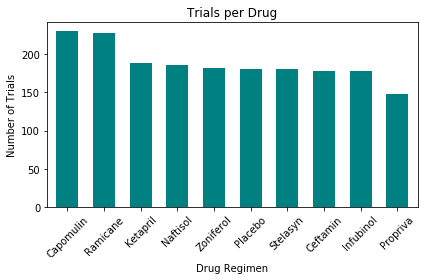

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

drug_counts = cleaned_df["Drug Regimen"].value_counts()
drug_counts.plot(kind = "bar", color = "teal", width = 0.6)

plt.title("Trials per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Trials")
plt.xticks(rotation = 45)

plt.tight_layout()

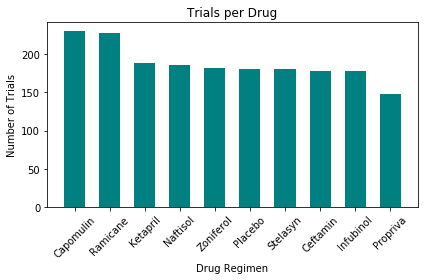

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis = cleaned_df["Drug Regimen"].value_counts().index
y_axis = cleaned_df["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis, color = "teal", width = 0.6)

plt.title("Trials per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Trials")
plt.xticks(rotation = 45)


plt.tight_layout()


## Pie Plots

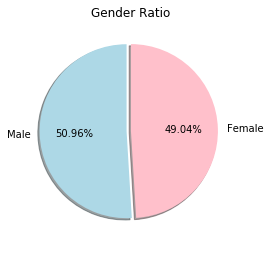

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_counts = cleaned_df["Sex"].value_counts()

gender_counts.plot(kind = "pie", 
                   colors = ["lightblue", "pink"], 
                   autopct="%0.2f%%", 
                   startangle = 90,
                   shadow = True,
                   explode=[0.05,0],
                   wedgeprops = {'linewidth': 1})

plt.title("Gender Ratio")
plt.xlabel(" ")
plt.ylabel(" ")

plt.show()

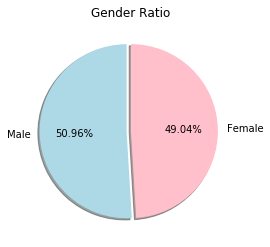

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts.values,
        labels = gender_counts.index,
        colors = ["lightblue", "pink"],
        autopct = "%0.2f%%", 
        startangle = 90,
        shadow = True, 
        explode=[0.05,0],
        wedgeprops = {'linewidth': 1})

plt.title("Gender Ratio")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#removed below line as best treatments are provided in the question
#best_treatments_list = statistics.sort_values(by = ["Mean"],ascending = True).head(4).index.to_list()
best_treatments_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
best_treatments_df = cleaned_df[cleaned_df["Drug Regimen"].isin(best_treatments_list)]

final_volume = best_treatments_df.sort_values("Timepoint", ascending = False)
final_volume = final_volume.drop_duplicates(keep = 'first', subset = "Mouse ID")

# Capomulin
capomulin = final_volume.loc[final_volume["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
quartile = capomulin.quantile([0.25,0.5,0.75])
lower = quartile[0.25]
upper = quartile[0.75]
iqr = upper - lower
lower_bound = lower - (1.5 * iqr)
upper_bound = upper + (1.5 * iqr)

capomulin_outliers_df = final_volume.loc[(final_volume['Tumor Volume (mm3)'] > upper_bound) | (final_volume['Tumor Volume (mm3)'] < lower_bound), :]
capomulin_outliers_df = capomulin_outliers_df[capomulin_outliers_df["Drug Regimen"] == "Capomulin"]

# Ramicane
ramicane = final_volume.loc[final_volume["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
quartile = ramicane.quantile([0.25,0.5,0.75])
lower = quartile[0.25]
upper = quartile[0.75]
iqr = upper - lower
lower_bound = lower - (1.5 * iqr)
upper_bound = upper + (1.5 * iqr)

ramicane_outliers_df = final_volume.loc[(final_volume['Tumor Volume (mm3)'] > upper_bound) | (final_volume['Tumor Volume (mm3)'] < lower_bound), :]
ramicane_outliers_df = ramicane_outliers_df[ramicane_outliers_df["Drug Regimen"] == "Ramicane"]

# Infubinol
infubinol = final_volume.loc[final_volume["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
quartile = infubinol.quantile([0.25,0.5,0.75])
lower = quartile[0.25]
upper = quartile[0.75]
iqr = upper - lower
lower_bound = lower - (1.5 * iqr)
upper_bound = upper + (1.5 * iqr)

infubinol_outliers_df = final_volume.loc[(final_volume['Tumor Volume (mm3)'] > upper_bound) | (final_volume['Tumor Volume (mm3)'] < lower_bound), :]
infubinol_outliers_df = infubinol_outliers_df[infubinol_outliers_df["Drug Regimen"] == "Infubinol"]

# Ceftamin
ceftamin = final_volume.loc[final_volume["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
quartile = ceftamin.quantile([0.25,0.5,0.75])
lower = quartile[0.25]
upper = quartile[0.75]
iqr = upper - lower
lower_bound = lower - (1.5 * iqr)
upper_bound = upper + (1.5 * iqr)

ceftamin_outliers_df = final_volume.loc[(final_volume['Tumor Volume (mm3)'] > upper_bound) | (final_volume['Tumor Volume (mm3)'] < lower_bound), :]
ceftamin_outliers_df = ceftamin_outliers_df[ceftamin_outliers_df["Drug Regimen"] == "Ceftamin"]

frames = [capomulin_outliers_df,ramicane_outliers_df,infubinol_outliers_df,ceftamin_outliers_df]
outliers = pd.concat(frames)
outliers


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


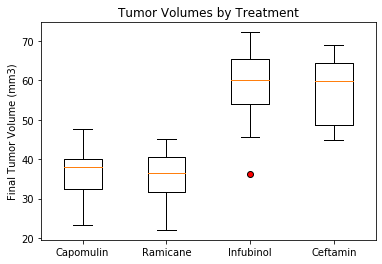

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops=dict(markerfacecolor='red'))

#Formatting
plt.title("Tumor Volumes by Treatment")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

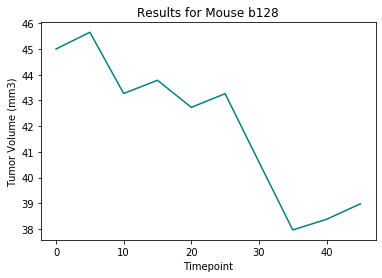

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

time = cleaned_df.loc[cleaned_df["Mouse ID"] == "b128"]
time = time["Timepoint"]
volume = cleaned_df.loc[cleaned_df["Mouse ID"] == "b128"]
volume = volume["Tumor Volume (mm3)"]

plt.plot(time, volume, color="teal")
plt.title("Results for Mouse b128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


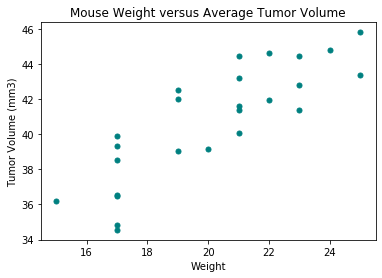

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

average = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin'].groupby(["Mouse ID"]).mean()

plt.scatter(average["Weight (g)"], average["Tumor Volume (mm3)"], s=25, c="teal" )

plt.title("Mouse Weight versus Average Tumor Volume")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

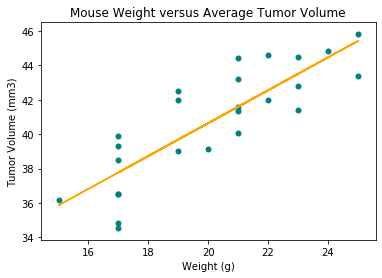

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = st.linregress(average["Weight (g)"], average["Tumor Volume (mm3)"])

regression = (average["Weight (g)"] * slope) + intercept

plt.plot(average["Weight (g)"], regression, color='orange')
plt.scatter(average["Weight (g)"], average["Tumor Volume (mm3)"], s=25, c="teal")

plt.title("Mouse Weight versus Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [18]:
print(f"Correlation between 'Weight' and 'Tumor Volume': {round(rvalue,2)}")

Correlation between 'Weight' and 'Tumor Volume': 0.84
